In [21]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from scipy.io import loadmat
from pandas import DataFrame
import glob
import scipy.signal as spsig
from sklearn import preprocessing
import pandas as pd
import csv
from tqdm import tqdm
import seaborn as sns


In [15]:
import eeglib

In [285]:
mat_pre = loadmat('data/Pat1Train/Pat1Train_14_1.mat')
mat_inter = loadmat('data/Pat1Train/Pat1Train_14_0.mat')
unfilt_data_pre = mat_pre['data']
unfilt_data_inter = mat_inter['data']

In [286]:
unfilt_data_pre

array([[ 52.671143 ,   4.6660156,  10.373291 , ..., -35.147705 ,
        -38.303223 , -37.90039  ],
       [ 53.678223 ,  11.716064 ,  15.341553 , ..., -33.133545 ,
        -35.34912  , -36.89331  ],
       [ 50.656982 ,  23.666748 ,  21.384033 , ..., -33.133545 ,
        -31.3208   , -34.94629  ],
       ...,
       [ -7.284668 , 134.71582  ,  -5.606201 , ...,   2.7861328,
         19.57129  ,  -5.9418945],
       [ -7.284668 , 144.65234  ,   3.390625 , ...,   5.807617 ,
         20.57837  ,  -4.9348145],
       [ -7.284668 , 135.65576  ,  13.327393 , ...,   8.761963 ,
         19.57129  ,  -2.9204102]], dtype=float32)

In [287]:
unfilt_data_inter

array([[  93.08911   ,   59.31787   ,  -76.23706   , ...,  -92.552     ,
        -152.77637   ,  -35.88623   ],
       [  89.12793   ,   59.31787   ,  -80.19824   , ..., -100.54175   ,
        -150.82935   ,  -36.89331   ],
       [  82.14551   ,   61.332275  ,  -86.24097   , ..., -105.57715   ,
        -146.80103   ,  -34.94629   ],
       ...,
       [ -72.81299   ,  -57.639404  ,   -0.23486328, ...,  177.34937   ,
         -14.804443  ,  -55.8938    ],
       [ -67.84473   ,  -49.582764  ,   -3.2563477 , ...,  181.37793   ,
         -12.790039  ,  -56.90088   ],
       [ -68.78467   ,  -48.575684  ,   -9.231689  , ...,  177.34937   ,
         -10.775879  ,  -56.90088   ]], dtype=float32)

In [288]:
print(unfilt_data_pre.shape)
print(unfilt_data_inter.shape)

(240000, 16)
(240000, 16)


In [321]:
unfilt_eeg_data_pre = eeglib.eeg.EEG(240000, 400, 16)
unfilt_eeg_data_inter = eeglib.eeg.EEG(240000, 400, 16)

unfilt_eeg_data_pre.set(unfilt_data_pre)
unfilt_eeg_data_inter.set(unfilt_data_inter)

In [83]:
# Perform z-score normalization - taken from eeglib helper function
from scipy.stats import zscore
data = zscore(data)
print(data.shape)
data

(240000, 16)


array([[ 0.5056598 , -0.05194973, -1.3151745 , ...,  1.2495348 ,
         1.0547212 , -0.56735015],
       [ 0.60906696, -0.14766373, -1.1573074 , ...,  1.4091601 ,
         1.0989348 , -0.53584874],
       [ 0.66164684, -0.33694947, -1.0941607 , ...,  1.6895155 ,
         1.1904111 , -0.53584874],
       ...,
       [-0.4074969 , -1.1621656 ,  0.65924656, ..., -0.5063733 ,
        -0.26103473,  0.9636486 ],
       [-0.64235383, -0.9090679 ,  0.59609973, ..., -0.5667358 ,
        -0.2839038 ,  0.9930499 ],
       [-0.903507  , -0.8452638 ,  0.59609973, ..., -0.6271032 ,
        -0.23816566,  0.90064585]], dtype=float32)

In [152]:
data_pre = preprocessing.scale(unfilt_data_pre, axis=0,with_std=True)
data_inter = preprocessing.scale(unfilt_data_inter, axis=0,with_std=True)

C:\Users\hanna\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\hanna\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
C:\Users\hanna\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\hanna\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the da

In [153]:
data_pre

array([[ 2.1783214 ,  0.1487107 ,  0.46562824, ..., -1.9186434 ,
        -2.7254548 , -2.8058686 ],
       [ 2.219972  ,  0.3757161 ,  0.68999827, ..., -1.8090568 ,
        -2.5156367 , -2.7313247 ],
       [ 2.0950203 ,  0.76051754,  0.96288085, ..., -1.8090568 ,
        -2.229521  , -2.5872061 ],
       ...,
       [-0.30131084,  4.3362    , -0.25601643, ...,  0.14526391,
         1.3851426 , -0.44029984],
       [-0.30131084,  4.6561475 ,  0.15028632, ...,  0.30965707,
         1.4566715 , -0.36575574],
       [-0.30131084,  4.3664656 ,  0.59903747, ...,  0.47039732,
         1.3851426 , -0.2166495 ]], dtype=float32)

In [154]:
data_inter

array([[ 2.9156742 ,  1.7256107 , -2.0459006 , ..., -1.5951396 ,
        -2.2944899 , -0.8160613 ],
       [ 2.7915905 ,  1.7256107 , -2.152101  , ..., -1.7325392 ,
        -2.2652931 , -0.8389143 ],
       [ 2.5728667 ,  1.7842468 , -2.3141084 , ..., -1.8191329 ,
        -2.2048862 , -0.79473186],
       ...,
       [-2.2811973 , -1.6788236 , -0.00825904, ...,  3.0463526 ,
        -0.2255224 , -1.2700791 ],
       [-2.1255667 , -1.444308  , -0.08926594, ...,  3.1156318 ,
        -0.19531526, -1.2929322 ],
       [-2.1550105 , -1.4149935 , -0.24946663, ...,  3.0463526 ,
        -0.16511178, -1.2929322 ]], dtype=float32)

In [155]:
eeg_data_pre = eeglib.eeg.EEG(240000, 400, 16)
eeg_data_inter = eeglib.eeg.EEG(240000, 400, 16)

In [157]:
eeg_data_pre.set(data_pre)
eeg_data_pre.getChannel()

array([[ 2.1783214 ,  2.219972  ,  2.0950203 , ..., -0.30131084,
        -0.30131084, -0.30131084],
       [ 0.1487107 ,  0.3757161 ,  0.76051754, ...,  4.3362    ,
         4.6561475 ,  4.3664656 ],
       [ 0.46562824,  0.68999827,  0.96288085, ..., -0.25601643,
         0.15028632,  0.59903747],
       ...,
       [-1.9186434 , -1.8090568 , -1.8090568 , ...,  0.14526391,
         0.30965707,  0.47039732],
       [-2.7254548 , -2.5156367 , -2.229521  , ...,  1.3851426 ,
         1.4566715 ,  1.3851426 ],
       [-2.8058686 , -2.7313247 , -2.5872061 , ..., -0.44029984,
        -0.36575574, -0.2166495 ]], dtype=float32)

In [158]:
eeg_data_inter.set(data_inter)
eeg_data_inter.getChannel()

array([[ 2.9156742 ,  2.7915905 ,  2.5728667 , ..., -2.2811973 ,
        -2.1255667 , -2.1550105 ],
       [ 1.7256107 ,  1.7256107 ,  1.7842468 , ..., -1.6788236 ,
        -1.444308  , -1.4149935 ],
       [-2.0459006 , -2.152101  , -2.3141084 , ..., -0.00825904,
        -0.08926594, -0.24946663],
       ...,
       [-1.5951396 , -1.7325392 , -1.8191329 , ...,  3.0463526 ,
         3.1156318 ,  3.0463526 ],
       [-2.2944899 , -2.2652931 , -2.2048862 , ..., -0.2255224 ,
        -0.19531526, -0.16511178],
       [-0.8160613 , -0.8389143 , -0.79473186, ..., -1.2700791 ,
        -1.2929322 , -1.2929322 ]], dtype=float32)

In [35]:
# Perform independent component analysis - taken from eeglib helper function
# from sklearn.decomposition import FastICA
# ica = FastICA()
# eeg_data = ica.fit_transform(np.transpose(data)).transpose()
# print(eeg_data.shape)
# eeg_data
# eeg_data.names = [str(i) for i in range(eeg_data.nChannels)]

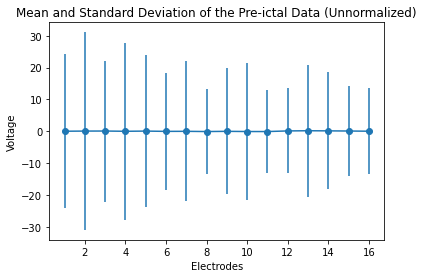

In [295]:
electrodes = np.arange(1,17)
mean = np.mean(unfilt_data_pre, axis=0)
std = np.std(unfilt_data_pre, axis=0)

plt.errorbar(electrodes, mean, yerr=std, fmt='-o')
plt.xlabel("Electrodes")
plt.ylabel("Voltage")
plt.title("Mean and Standard Deviation of the Pre-ictal Data (Unnormalized)")

plt.show()


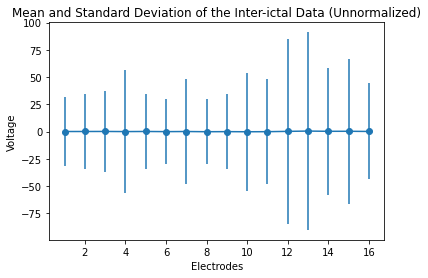

In [296]:
electrodes = np.arange(1,17)
mean = np.mean(unfilt_data_inter, axis=0)
std = np.std(unfilt_data_inter, axis=0)

plt.errorbar(electrodes, mean, yerr=std, fmt='-o')
plt.xlabel("Electrodes")
plt.ylabel("Voltage")
plt.title("Mean and Standard Deviation of the Inter-ictal Data (Unnormalized)")

plt.show()

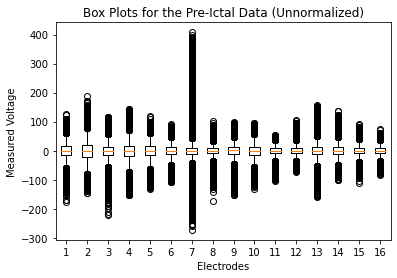

In [301]:
plt.boxplot(unfilt_data_pre)
plt.title("Box Plots for the Pre-Ictal Data (Unnormalized)")
plt.xlabel("Electrodes")
plt.ylabel("Measured Voltage")
plt.show()

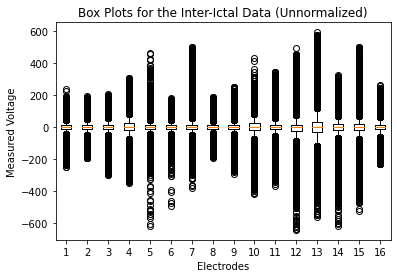

In [300]:
plt.boxplot(unfilt_data_inter)
plt.title("Box Plots for the Inter-Ictal Data (Unnormalized)")
plt.xlabel("Electrodes")
plt.ylabel("Measured Voltage")
plt.show()

In [159]:
cross_corr_pre = eeg_data_pre.CCC()
print(len(cross_corr_pre))
cross_corr_pre

120


[-0.11258168975857102,
 0.022931691613507995,
 -0.20207092719894423,
 -0.10681382393873766,
 -0.07978162898645576,
 -0.17594710668611682,
 -0.17163392059097043,
 0.0298402711887361,
 0.04101508088099831,
 -0.07051322092320869,
 -0.05163146829637512,
 -0.06368795652818585,
 -0.046121623982114425,
 -0.06780882329302458,
 -0.15314266235450344,
 -0.1994430583172038,
 0.22357102902782075,
 -0.07920613434902146,
 -0.21947770311853323,
 -0.0467361221078278,
 -0.15623949012017496,
 -0.10432735314690776,
 -0.3108967832063366,
 -0.08787091255483191,
 -0.16934095786455253,
 -0.09479402880365961,
 -0.181819400830504,
 -0.14664404241272824,
 -0.07572342149812836,
 -0.14381118526913167,
 -0.08147299200723494,
 -0.06191453647826938,
 -0.14435311865980385,
 -0.1268369920662398,
 -0.1085678611033014,
 0.026148310945547384,
 -0.005006895294202529,
 0.005623682427141725,
 -0.04821435839488551,
 -0.03199407920180809,
 -0.015452150299876566,
 -0.07638031236068334,
 -0.08923540291173108,
 -0.180302786127811

In [160]:
cross_corr_inter = eeg_data_inter.CCC()
print(len(cross_corr_inter))
cross_corr_inter

120


[0.30744015446569356,
 0.3135537274073114,
 0.03544151016337264,
 0.21820090763331865,
 0.2206748369185595,
 -0.3444286008642429,
 0.04758146333227813,
 0.40518770400461335,
 0.3138943060446371,
 -0.15279618555473723,
 0.08969469233125037,
 -0.41047861149537646,
 -0.0770415634526104,
 -0.4448134902095706,
 -0.33798221455091304,
 0.2516684462188801,
 0.2675293236515787,
 0.2061123901447958,
 0.09439076166207039,
 -0.10047142351452132,
 0.06320215768212169,
 0.23302100476290433,
 0.017088681579227254,
 -0.11918660600639495,
 -0.07031867311394752,
 -0.3166980979025997,
 -0.24595712270153705,
 -0.3501085603754391,
 -0.13832404831806872,
 0.09583849879811003,
 0.11769756306545624,
 0.10897698105626842,
 -0.05461823444863278,
 -0.11767470193115447,
 -0.03786970657066115,
 -0.01831688911521329,
 0.07207439735580103,
 -0.3093559928908002,
 -0.14242339141992671,
 -0.183245423739905,
 -0.20907073140679078,
 0.007096988570552991,
 0.15937796155769962,
 0.11581904435908377,
 -0.176203167046298,
 0

In [161]:
cross_corr_matrix_pre = list()
for idx1, elec1 in enumerate(np.transpose(data_pre)):
    cross_corr = list()
    for idx2, elec2 in enumerate(np.transpose(data_pre)):
        cross_corr.append(np.corrcoef(data_pre[:,idx1], data_pre[:,idx2])[0,1])
    cross_corr_matrix_pre.append(cross_corr)

<AxesSubplot:>

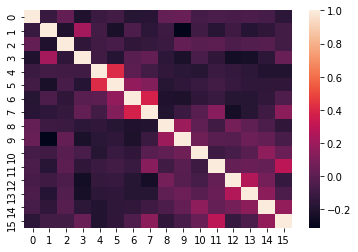

In [162]:
sns.heatmap(cross_corr_matrix_pre)

In [163]:
cross_corr_matrix_inter = list()
for idx1, elec1 in enumerate(np.transpose(data_inter)):
    cross_corr = list()
    for idx2, elec2 in enumerate(np.transpose(data_inter)):
        cross_corr.append(np.corrcoef(data_inter[:,idx1], data_inter[:,idx2])[0,1])
    cross_corr_matrix_inter.append(cross_corr)

<AxesSubplot:>

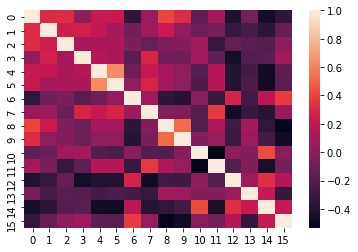

In [164]:
sns.heatmap(cross_corr_matrix_inter)

In [110]:
cross_corr_matrix = list()
for idx1, elec1 in enumerate(np.transpose(data)):
    cross_corr = list()
    for idx2, elec2 in enumerate(np.transpose(data)):
        cross_corr.append(eeg_data.CCC(channels=[idx1,idx2])[0])
    cross_corr_matrix.append(cross_corr)

<AxesSubplot:>

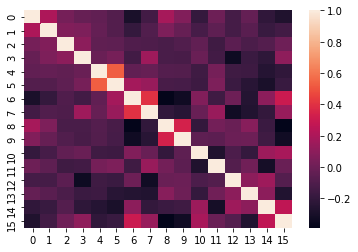

In [74]:
sns.heatmap(cross_corr_matrix)

In [197]:
defaultBands = {"delta": (1, 4), "theta": (4, 7),
                "alpha": (8, 12), "beta": (12, 30), 
                "gamma": (30, 100)}

In [213]:
b_pwr_pre = eeg_data_pre.bandPower(spectrumFrom="PSD", bands=defaultBands)
print(len(b_pwr_pre))
b_pwr_pre

16


[{'delta': 0.139650359749794,
  'theta': 0.11764360219240189,
  'alpha': 0.08535809069871902,
  'beta': 0.3690013885498047,
  'gamma': 0.08047843724489212},
 {'delta': 0.11521503329277039,
  'theta': 0.07357538491487503,
  'alpha': 0.03828843683004379,
  'beta': 0.10885249823331833,
  'gamma': 0.052666861563920975},
 {'delta': 0.22128775715827942,
  'theta': 0.1510666012763977,
  'alpha': 0.07837019115686417,
  'beta': 0.25095486640930176,
  'gamma': 0.09480394423007965},
 {'delta': 0.2741433382034302,
  'theta': 0.08505243808031082,
  'alpha': 0.023468684405088425,
  'beta': 0.03228966146707535,
  'gamma': 0.007709758821874857},
 {'delta': 0.4993143379688263,
  'theta': 0.1431456208229065,
  'alpha': 0.045432157814502716,
  'beta': 0.09228921681642532,
  'gamma': 0.04070347920060158},
 {'delta': 0.37572306394577026,
  'theta': 0.17869912087917328,
  'alpha': 0.0451761931180954,
  'beta': 0.0827745646238327,
  'gamma': 0.03822128474712372},
 {'delta': 0.21682706475257874,
  'theta': 0.

In [214]:
delta_pre = list()
theta_pre = list()
alpha_pre = list()
beta_pre = list()
gamma_pre = list()
for idx, elec in enumerate(b_pwr_pre):
    delta_pre.append(b_pwr_pre[idx]["delta"])
    theta_pre.append(b_pwr_pre[idx]["theta"])
    alpha_pre.append(b_pwr_pre[idx]["alpha"])
    beta_pre.append(b_pwr_pre[idx]["beta"])
    gamma_pre.append(b_pwr_pre[idx]["gamma"])

In [215]:
len(delta_pre)

16

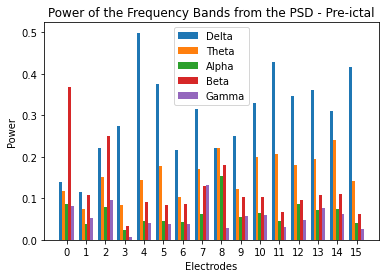

In [217]:
electrodes = np.arange(0,16)
  
X_axis = np.arange(len(electrodes))
  
plt.bar(X_axis - 0.3, delta_pre, 0.15, label = 'Delta')
plt.bar(X_axis - 0.15, theta_pre, 0.15, label = 'Theta')
plt.bar(X_axis, alpha_pre, 0.15, label = 'Alpha')
plt.bar(X_axis + 0.15, beta_pre, 0.15, label = 'Beta')
plt.bar(X_axis + 0.3, gamma_pre, 0.15, label = 'Gamma')
  
plt.xticks(X_axis, electrodes)
plt.xlabel("Electrodes")
plt.ylabel("Power")
plt.title("Power of the Frequency Bands from the PSD - Pre-ictal")
plt.legend()
plt.show()

In [218]:
b_pwr_inter = eeg_data_inter.bandPower(spectrumFrom="PSD", bands=defaultBands)
print(len(b_pwr_inter))
b_pwr_inter

16


[{'delta': 0.33785000443458557,
  'theta': 0.10568824410438538,
  'alpha': 0.0548856258392334,
  'beta': 0.1342351883649826,
  'gamma': 0.03199093043804169},
 {'delta': 0.32947152853012085,
  'theta': 0.10894131660461426,
  'alpha': 0.03362008556723595,
  'beta': 0.05933934077620506,
  'gamma': 0.02754879929125309},
 {'delta': 0.4567072093486786,
  'theta': 0.12758591771125793,
  'alpha': 0.034052081406116486,
  'beta': 0.039826713502407074,
  'gamma': 0.013158058747649193},
 {'delta': 0.4048510491847992,
  'theta': 0.11137641966342926,
  'alpha': 0.011249653063714504,
  'beta': 0.009984657168388367,
  'gamma': 0.004318296443670988},
 {'delta': 0.5459747314453125,
  'theta': 0.1705733686685562,
  'alpha': 0.03640829399228096,
  'beta': 0.04367014765739441,
  'gamma': 0.01949450746178627},
 {'delta': 0.5141029357910156,
  'theta': 0.15846805274486542,
  'alpha': 0.025209125131368637,
  'beta': 0.023354656994342804,
  'gamma': 0.01054010633379221},
 {'delta': 0.4261653423309326,
  'theta

In [219]:
delta_inter = list()
theta_inter = list()
alpha_inter = list()
beta_inter = list()
gamma_inter = list()
for idx, elec in enumerate(b_pwr_inter):
    delta_inter.append(b_pwr_inter[idx]["delta"])
    theta_inter.append(b_pwr_inter[idx]["theta"])
    alpha_inter.append(b_pwr_inter[idx]["alpha"])
    beta_inter.append(b_pwr_inter[idx]["beta"])
    gamma_inter.append(b_pwr_inter[idx]["gamma"])

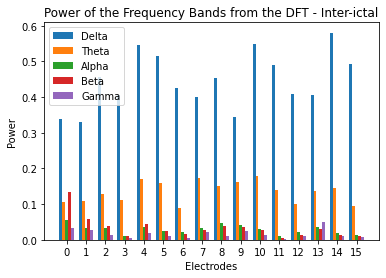

In [220]:
electrodes = np.arange(0,16)
  
X_axis = np.arange(len(electrodes))
  
plt.bar(X_axis - 0.3, delta_inter, 0.15, label = 'Delta')
plt.bar(X_axis - 0.15, theta_inter, 0.15, label = 'Theta')
plt.bar(X_axis, alpha_inter, 0.15, label = 'Alpha')
plt.bar(X_axis + 0.15, beta_inter, 0.15, label = 'Beta')
plt.bar(X_axis + 0.3, gamma_inter, 0.15, label = 'Gamma')
  
plt.xticks(X_axis, electrodes)
plt.xlabel("Electrodes")
plt.ylabel("Power")
plt.title("Power of the Frequency Bands from the DFT - Inter-ictal")
plt.legend()
plt.show()

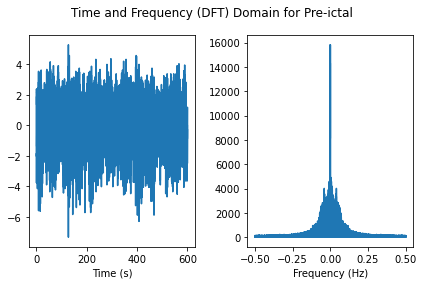

In [264]:
time_data = eeg_data_pre.getChannel(0)
dft = eeg_data_pre.DFT(output="magnitude")[0,:]

fig, ax = plt.subplots(1, 2)

t = np.arange(0,len(time_data)/400, 1/400)
ax[0].plot(t, time_data)
ax[0].set_xlabel("Time (s)")

freq = np.fft.fftfreq(t.shape[-1])
ax[1].plot(freq, dft)
ax[1].set_xlabel("Frequency (Hz)")


fig.suptitle('Time and Frequency (DFT) Domain for Pre-ictal')
fig.tight_layout()

plt.show()

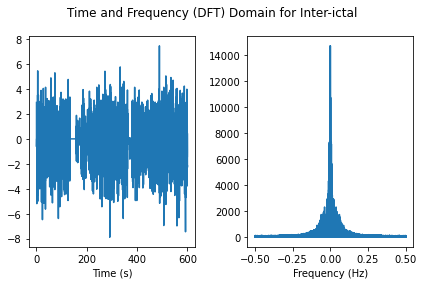

In [265]:
time_data = eeg_data_inter.getChannel(0)
dft = eeg_data_inter.DFT(output="magnitude")[0,:]

fig, ax = plt.subplots(1, 2)

t = np.arange(0,len(time_data)/400, 1/400)
ax[0].plot(t, time_data)
ax[0].set_xlabel("Time (s)")

freq = np.fft.fftfreq(t.shape[-1])
ax[1].plot(freq, dft)
ax[1].set_xlabel("Frequency (Hz)")

fig.suptitle('Time and Frequency (DFT) Domain for Inter-ictal')
fig.tight_layout()

plt.show()

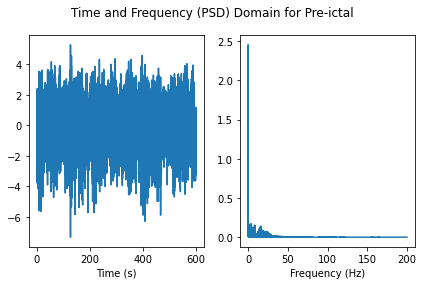

In [266]:
time_data = eeg_data_pre.getChannel(0)
f, psd = eeg_data_pre.PSD(retFrequencies=True)[0,:]

fig, ax = plt.subplots(1, 2)

t = np.arange(0,len(time_data)/400, 1/400)
ax[0].plot(t, time_data)
ax[0].set_xlabel("Time (s)")

ax[1].plot(f, psd)
ax[1].set_xlabel("Frequency (Hz)")

fig.suptitle('Time and Frequency (PSD) Domain for Pre-ictal')
fig.tight_layout()

plt.show()

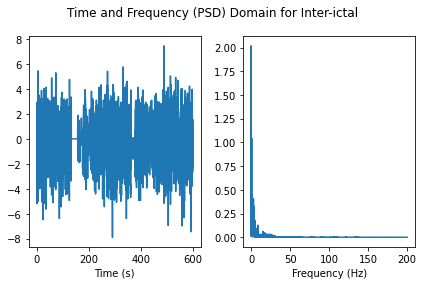

In [267]:
time_data = eeg_data_inter.getChannel(0)
f, psd = eeg_data_inter.PSD(retFrequencies=True)[0,:]

fig, ax = plt.subplots(1, 2)

t = np.arange(0,len(time_data)/400, 1/400)
ax[0].plot(t, time_data)
ax[0].set_xlabel("Time (s)")

ax[1].plot(f, psd)
ax[1].set_xlabel("Frequency (Hz)")

fig.suptitle('Time and Frequency (PSD) Domain for Inter-ictal')
fig.tight_layout()

plt.show()

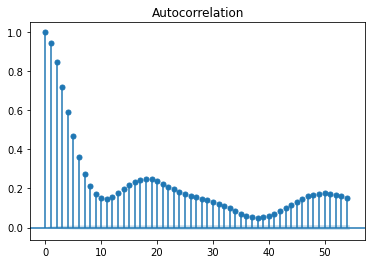

In [307]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(eeg_data_pre.getChannel(0))
plt.show()

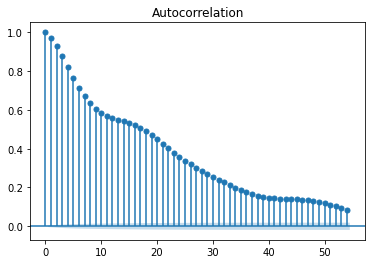

In [308]:
plot_acf(eeg_data_inter.getChannel(0))
plt.show()

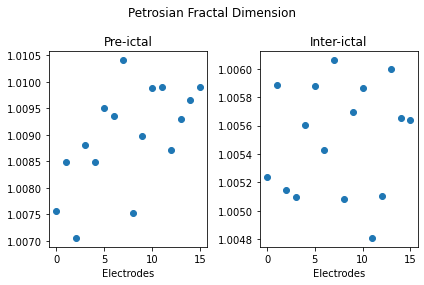

In [323]:
pfd_pre = eeg_data_pre.PFD()
pfd_inter = eeg_data_inter.PFD()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, pfd_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, pfd_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Petrosian Fractal Dimension')
fig.tight_layout()

plt.show()

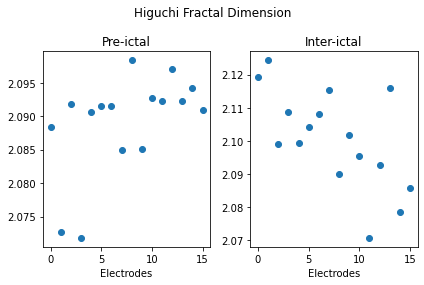

In [373]:
# Takes nearly 7 min for one data set
hfd_pre = eeg_data_pre.HFD()
hfd_inter = eeg_data_inter.HFD()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, hfd_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, hfd_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Higuchi Fractal Dimension')
fig.tight_layout()

plt.show()

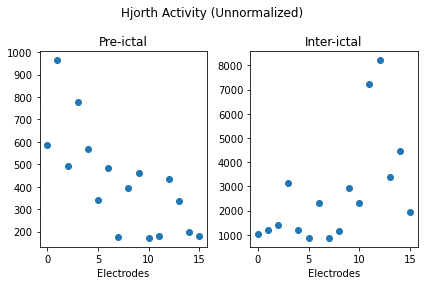

In [325]:
h_act_pre = unfilt_eeg_data_pre.hjorthActivity()
h_act_inter = unfilt_eeg_data_inter.hjorthActivity()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, h_act_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, h_act_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Hjorth Activity (Unnormalized)')
fig.tight_layout()

plt.show()

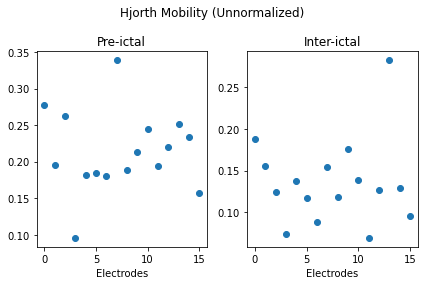

In [326]:
h_mob_pre = unfilt_eeg_data_pre.hjorthMobility()
h_mob_inter = unfilt_eeg_data_inter.hjorthMobility()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, h_mob_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, h_mob_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Hjorth Mobility (Unnormalized)')
fig.tight_layout()

plt.show()

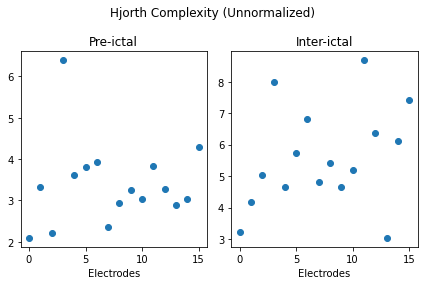

In [327]:
h_comp_pre = unfilt_eeg_data_pre.hjorthComplexity()
h_comp_inter = unfilt_eeg_data_inter.hjorthComplexity()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, h_comp_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, h_comp_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Hjorth Complexity (Unnormalized)')
fig.tight_layout()

plt.show()

In [9]:
# kills kernel
# synch = eeg_data.synchronizationLikelihood()
# print(synch.shape)
# synch

Error: Canceled future for execute_request message before replies were done

In [329]:
eng_pre = eeg_data_pre.engagementLevel()
eng_inter = eeg_data_inter.engagementLevel()

print(eng_pre)
print(eng_inter)

1.2227876922098053
0.7104147036682006


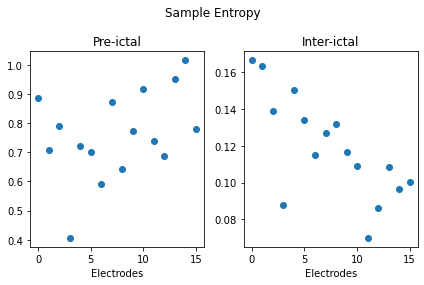

In [374]:
# Takes 15 minutes for one set
entr_pre = eeg_data_pre.sampEn()
entr_inter = eeg_data_inter.sampEn()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, entr_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, entr_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Sample Entropy')
fig.tight_layout()

plt.show()

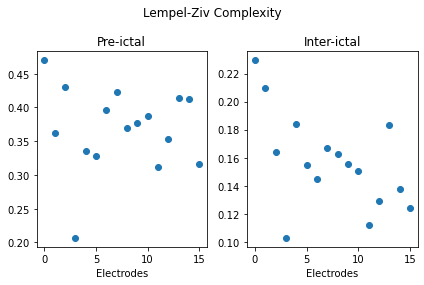

In [375]:
# Takes 5 minutes for one set
lzc_pre = eeg_data_pre.LZC()
lzc_inter = eeg_data_inter.LZC()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, lzc_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, lzc_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Lempel-Ziv Complexity')
fig.tight_layout()

plt.show()


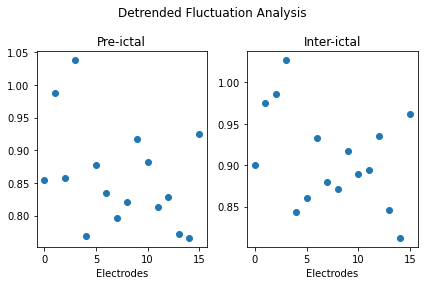

In [333]:
dfa_pre = eeg_data_pre.DFA()
dfa_inter = eeg_data_inter.DFA()

electrodes = np.arange(0,16) 
X_axis = np.arange(len(electrodes))

fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_axis, dfa_pre)
ax[0].set_xlabel("Electrodes")
ax[0].set_title("Pre-ictal")

ax[1].scatter(X_axis, dfa_inter)
ax[1].set_xlabel("Electrodes")
ax[1].set_title("Inter-ictal")

fig.suptitle('Detrended Fluctuation Analysis')
fig.tight_layout()

plt.show()

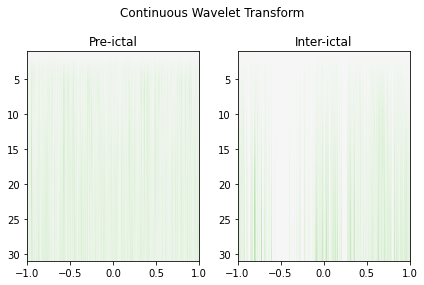

In [372]:
from scipy import signal

widths = np.arange(1, 31)
cwtmatr_pre = signal.cwt(eeg_data_pre.getChannel(0), signal.ricker, widths)
cwtmatr_inter = signal.cwt(eeg_data_inter.getChannel(0), signal.ricker, widths)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(abs(cwtmatr_pre), extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr_pre).max(), vmin=-abs(cwtmatr_pre).max())
ax[0].set_title("Pre-ictal")

ax[1].imshow(abs(cwtmatr_inter), extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr_inter).max(), vmin=-abs(cwtmatr_inter).max())
ax[1].set_title("Inter-ictal")

fig.suptitle('Continuous Wavelet Transform')
fig.tight_layout()

plt.show()

In [13]:
# Took ~50 minutes
# dtw = eeg_data.DTW()
# print(len(dtw))
# dtw

120


[153951.09141501517,
 173248.81788435695,
 151860.83103856328,
 177430.67191673082,
 141573.42405462964,
 185070.68611051887,
 148450.5555232237,
 176506.5515674064,
 144680.48193194374,
 138998.9140048524,
 160160.96529287793,
 149570.42054581334,
 150369.87462279474,
 166994.68194212357,
 153650.5798765932,
 131951.58342887246,
 130901.20295178425,
 138687.3929495269,
 138562.3472244736,
 139107.89751505095,
 156169.51665221888,
 147143.00875209004,
 156213.1399517859,
 148864.7457751506,
 155729.01216937904,
 162259.46454280894,
 148856.41007554543,
 143895.89681623538,
 148811.9416499702,
 135376.86079495627,
 135893.4883983928,
 146631.38863933051,
 140255.04442193318,
 144500.2660165123,
 146002.82784556953,
 140343.61558617215,
 145352.12428826746,
 152062.66376186535,
 143775.36055799056,
 152757.06230457558,
 156973.38838768733,
 132647.8534833067,
 123548.36105431837,
 126872.02738647675,
 130656.08566381293,
 132848.97471695242,
 143774.98454634426,
 127478.98459065228,
 134